In [90]:
!ls /data/guided-diffusion/scale/rbf_ecp_marginal -ln | wc -l

252


100
saved /data/guided-diffusion/scale/rbf_ecp_marginal/NFE=10,p=2.npz


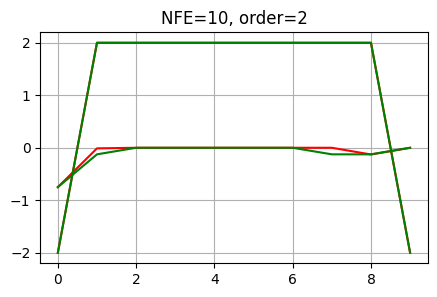

100
saved /data/guided-diffusion/scale/rbf_ecp_marginal/NFE=10,p=3.npz


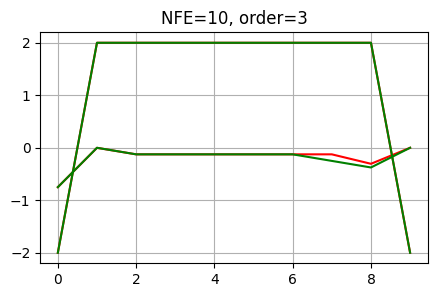

89
saved /data/guided-diffusion/scale/rbf_ecp_marginal/NFE=20,p=2.npz


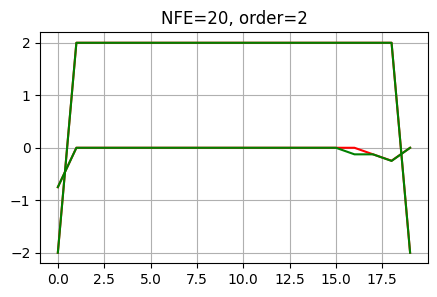

ValueError: need at least one array to stack

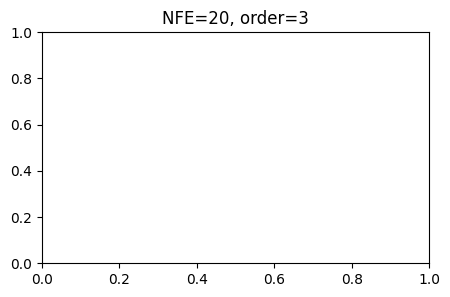

In [94]:
import os
import numpy as np
import matplotlib.pyplot as plt

root_dir = '/data/guided-diffusion/scale/rbf_ecp_marginal'
for NFE in [10, 20, 30]:
    for order in [2, 3]:
        optimal_log_scales_list = []
        plt.figure(figsize=[5, 3])
        plt.title(f"NFE={NFE}, order={order}")
        for number in range(100):
            npz_file = os.path.join(root_dir, f'NFE={NFE},p={order},number={number}.npz')
            if not os.path.exists(npz_file):
                continue
            data = np.load(npz_file)
            #plt.plot(data['optimal_log_scales'].T, color='blue', alpha=0.2)
            optimal_log_scales_list.append(data['optimal_log_scales'])
        optimal_log_scales = np.stack(optimal_log_scales_list, axis=0)
        print(len(optimal_log_scales))
        optimal_log_scales = np.mean(optimal_log_scales, axis=0)
        save_file = os.path.join(root_dir, f'NFE={NFE},p={order}.npz')
        np.savez(save_file,
                 optimal_log_scales=optimal_log_scales)
        print('saved', save_file)

        plt.plot(optimal_log_scales.T, color='red')
        data = np.load(f'/data/guided-diffusion/scale/rbf_ecp/NFE={NFE},p={order}.npz')
        plt.plot(data['optimal_log_scales'].T, color='green')
        plt.grid()
        plt.show()
        


In [71]:
optimal_log_scales_list

[]